## Linear Regression
### Simple Linear Regression Basic
* Allow us to understand relaionship between two continous variables

$$ y = ax + b $$

Where `x` is independent variable and `y` is dependent variable. 

#### Aim of Linear Regression
* Minimize the distance between the points and the line $(y=ax+b)$ 
* Adjusting:
    1. Coefficents: $a$
    2. Bias/Intercept: $b$

### Building a Linear Regression Model

In [45]:
import numpy as np

In [46]:
# Building a Toy Dataset
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [47]:
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [48]:
# IMPORTANTL: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

In [49]:
# y = 2x +1
y_values = [2*i+1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [50]:
y_train = np.array(y_values, dtype=np.float32)
y_train.shape

(11,)

In [51]:
# IMPORTANTL: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

#### Build Model

In [52]:
import torch
import torch.nn as nn

1. Linear model: 
    * True Equation: $y = 2x + 1$
2 Forward
    * Example: 
        * Input $x = 1$
        * Output $\hat{y} = ?$

In [53]:
# Create Class

class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__() # inherits nn 
        self.linear = nn.Linear(input_dim, output_dim) # input_dim is x, output_dim is y
    
    def forward(self, x):
        out = self.linear(x)
        return out

#### Instantiate Model Class
* Input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
* Dessired Output: [1, 3, 5,7, 9, 11, 13, 15, 17, 19, 21]

In [54]:
input_dim = 1
output_dim = 1
model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Loss Class
* MSE Loss: Meean Square Error

$$ \frac{1}{n}\sum{n}{i=1}(\hat{y_i}-y_i) $$

Where $\hat{y}$ is prediction and $y$ is true value.

In [55]:
criterion = nn.MSELoss()

#### Instantiate Optimizer Class

In [56]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [57]:
epochs = 100
for epoch in range(epochs):
    epoch += 1
    
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)
    
    # clear gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # forward to get output
    outputs = model(inputs) # output is y and inputs in x
    
    # calculate loss
    loss = criterion(outputs, labels)
    
    # getting gradients w.r.t. parameters
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 1, loss 186.96054077148438
epoch 2, loss 15.32177448272705
epoch 3, loss 1.3209367990493774
epoch 4, loss 0.17813843488693237
epoch 5, loss 0.08413803577423096
epoch 6, loss 0.07569334656000137
epoch 7, loss 0.07423590868711472
epoch 8, loss 0.073356993496418
epoch 9, loss 0.0725337341427803
epoch 10, loss 0.07172360271215439
epoch 11, loss 0.07092259079217911
epoch 12, loss 0.07013057917356491
epoch 13, loss 0.06934747844934464
epoch 14, loss 0.06857305020093918
epoch 15, loss 0.06780726462602615
epoch 16, loss 0.06705009937286377
epoch 17, loss 0.06630133092403412
epoch 18, loss 0.0655609592795372
epoch 19, loss 0.06482881307601929
epoch 20, loss 0.06410495936870575
epoch 21, loss 0.06338899582624435
epoch 22, loss 0.06268119066953659
epoch 23, loss 0.06198115646839142
epoch 24, loss 0.06128912791609764
epoch 25, loss 0.06060469150543213
epoch 26, loss 0.059927985072135925
epoch 27, loss 0.05925868824124336
epoch 28, loss 0.05859703943133354
epoch 29, loss 0.05794261768460274
e

#### Compare Data

In [58]:
predicted = model(torch.from_numpy(x_train)).data.numpy()

In [59]:
predicted

array([[ 0.699443 ],
       [ 2.7427258],
       [ 4.786009 ],
       [ 6.829292 ],
       [ 8.872575 ],
       [10.915858 ],
       [12.959141 ],
       [15.002423 ],
       [17.045708 ],
       [19.088991 ],
       [21.132275 ]], dtype=float32)

In [60]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

#### Plot Graph

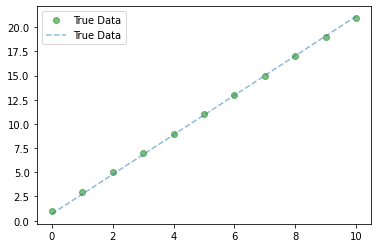

In [61]:
import matplotlib.pyplot as plt

# clear figure
plt.clf()

# get predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# plat true data
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)

# plat true data
plt.plot(x_train, predicted, '--', label='True Data', alpha=0.5)

# legend and plot
plt.legend(loc='best')
plt.show()

#### Save Model

In [62]:
save_model = True
if save_model:
    # Save only parameters
    torch.save(model.state_dict(), 'lr_model.pkl')

#### Load Model

In [63]:
load_model = True
if load_model is True:
    model.load_state_dict(torch.load('lr_model.pkl'))